# Welcome to the Tutorial. This can be a good start from someone , having absoultely zero to no experience , programming in Python , Maybe , by this tutorial series  , you and me can learn together , and see how we can use Python for LIBS Spectra Data Analysis. I will be using Jupyter Lab for the Tutorial. 

# SOME BACKGROUND

~ STEP 1 :- First download the latest Python Veriosn 
            https://www.python.org/downloads/

Please Install the downloaded file on your computer using custom Installation settings. 

~ STEP 2 :- After the installation is done , Open  , In MAC - Terminal or WIN - Terminal , and type "Python3 --version"
 for MAC or "Python --version" for WIN and press Enter 

 If , the Terminal , returns with the verion of Python like "Python 3.11.1" , Installation has been succesful , and then we can proceed further , if not , please check if STEP 1 has been accomplished

~STEP 3 :- After we are done  with the STEP 2 , I am using the Jupytr Lab for the tutorials. , type in terminal "pip install jupyter lab" , this will install the latest verison of Jupyter Lab on your system , automatically you will be redirected to the browser 

~ STEP 4 :- To check , if the installation of Jupyter lab has been successful , type "jupyter lab --version" on Terminal. If , the Terminal , returns with the verion of Jupyter Lab like "4.1.2" , Installation has been succesful , and then we can proceed further , if not , please check if STEP 3 has been accomplished

~ STEP 5 :- A library is a collection of code that makes everyday tasks more efficient. For my tutorial i would recommend Installing pandas , numpy - For data analysis , seaborn , matplotlib - For Visualisation.  

Also , i would be Installing a library called "peakutils" , this woulbe be useful for recogisation of Peaks from the Spectra. https://peakutils.readthedocs.io/en/latest/


~ STEP 6 :- For installing the library , go to terminal , and type "pip install pandas" and after installing . Similarly , do this for numpy , seaborn , matplotlin and PeakUtils

~ STEP 7 :- Now , to open the Jupyter Lab seession in the browser , go to terminal and type "jupyter lab" , you will be automatically redirected to the browser in a jupyter lab session. This is where you will start programming . 

NOTE :- To exit the session , press "Ctrl + C" on the termianal , this will end the running session on your system

~ STEP 8 :- In jupyter lab , your lines of codes or chunk of lines of codes  are called as "Cell" , If the "Cell are of type Markdown - Used for Comments / Information " and If the "Cells are of type Code - Used for Programming" 

You can get more in fo here -  https://www.datacamp.com/tutorial/installing-jupyter-notebook


# CODE BEGINS

# Importing the Useful librararies. 

Line [1] is completely optional , This is used to Hide the the Warnings in the Output cell. It's recommended to skip the line[1] , and proceed with the code from line[2].

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.getcwd()

'/Users/patil90/Handheld_LIBS/TUT1_LIBS_Peak_Identification'

Line [2] is basicllay importing the Installed Libraries earlier and calling them in the IDE for interacting with them. 

Now , what does import "import pandas as pd"  mean ? 

-> For pandas, we usually import pandas with the pd alias, which means we refer to pandas as pd in the code instead of writing “pandas” each time. Alias is an alternate name that can be used for referencing the same thing again and again

Now , what does "from peakutils import indexes" mean ? 

-> So , here peakutils is an library , The import statement allows you to import all the functions from a library into your code. Often, though, you'll only want to import a few functions, or just one. If this is the case, you can use the from statement. This essentially mean this line will import "indexes " function from the library "peakutils".


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from peakutils import indexes
from  scipy.signal import find_peaks as fp


from bokeh.plotting import figure , show

from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [4]:
file_path = 'Spectra/CR240LA/1780.csv'

Sample_Spectra = pd.read_csv(file_path)
Sample_Spectra = Sample_Spectra.rename({'intensity':'Intensities'},axis=1)


Sample_Spectra_Plot = figure(title = 'Raw Sample Spectra' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')
Sample_Spectra_Plot.line(Sample_Spectra.wavelength,Sample_Spectra.Intensities , line_width = 2, color ="green" )
Sample_Spectra_Plot.width = 1200
Sample_Spectra_Plot.height = 600

print (Sample_Spectra)
show (Sample_Spectra_Plot)


       wavelength  Intensities
0      180.000000          0.0
1      180.033333          0.0
2      180.066667          0.0
3      180.100000          0.0
4      180.133333          0.0
...           ...          ...
23426  960.866667          0.0
23427  960.900000          0.0
23428  960.933333          0.0
23429  960.966667          0.0
23430  961.000000          0.0

[23431 rows x 2 columns]


Now , as we see in the figure avove , the spectral information of  'CR201LA' , may have different element composition , like Fe , Al ,Cr , Cu.  

My Goal of this tutorial is to identify the Peaks for the element like Al, Cr , Cu , Fe , Mn , Mo , Ni , Si from the above spectral information. 
Ofcourse , Quantitative analysis would be difficult , but we can try to do Qualitative analysis.

In line [4] , Here, Also i will , try to focus on one element at a time thats why , i have used if..elif..else statement. 

Now , i have visited the https://physics.nist.gov/PhysRefData/ASD/LIBS/libs-form.html  , website one of the best LIBS database to get information on element spectra. 

I have searched the spectra of each element , from the website and the Spectra Information of the elemnt is stored in /NIST/ folder in the directory in their specific .csv format , example: Al.csv will have all the spectral information for Aluminium 



In [21]:

element = 'Al' # ENTER YOUR ELEMENT OF 

if element =='Al':
    Reference_Spectra = pd.read_csv(r"NIST/Al.csv" , encoding = 'windows - 1252')
  
elif element =='Cr':
    Reference_Spectra = pd.read_csv(r"NIST/Cr.csv" , encoding = 'windows - 1252')
    
elif element =='Cu':
    Reference_Spectra = pd.read_csv(r"NIST/Cu.csv" , encoding = 'windows - 1252')
    
elif element =='Fe':
    Reference_Spectra = pd.read_csv(r"NIST/Fe.csv" , encoding = 'windows - 1252')
    
elif element =='Mn':
    Reference_Spectra = pd.read_csv(r"NIST/Mn.csv" , encoding = 'windows - 1252')
    
elif element =='Mo':
    Reference_Spectra = pd.read_csv(r"NIST/Mo.csv" , encoding = 'windows - 1252')
    
elif element =='Ni':
    Reference_Spectra = pd.read_csv(r"NIST/Ni.csv" , encoding = 'windows - 1252')
    
elif element =='Si':
    Reference_Spectra = pd.read_csv(r"NIST/Si.csv" , encoding = 'windows - 1252')


    
elif element == '':
    print("Please Enter Element")
    
else:
    print ("Invalid Element Entered")

print(Reference_Spectra)

Reference_Spectra_Plot = figure(title = 'NIST Reference Library' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensity')
Reference_Spectra_Plot.line(Reference_Spectra.Wavelength,Reference_Spectra.Spectra , line_width = 2, color ="blue" )
Reference_Spectra_Plot.width = 1200
Reference_Spectra_Plot.height = 600

show(Reference_Spectra_Plot)




     Wavelength       Spectra
0        170.91  6.110000e-07
1        170.96  1.830000e-05
2           171  2.460000e-04
3        171.04  2.960000e-03
4        171.08  3.210000e-02
...         ...           ...
7618     966.21  1.050000e-16
7619     966.26  5.710000e-17
7620      966.3  3.490000e-17
7621     966.34  2.130000e-17
7622     966.38  1.290000e-17

[7623 rows x 2 columns]


# 1:- APPROACH FOR PEAK DETECTION (Peak_Util library)

Now, uptil now , we have selected the Material Sample ,which we want to Interact with and the data is stored in variable "Sample_Spectra"
Also , we have choosen the element , which we want to detect in this 'Sample_Spectra' , and the spectral information for that element is stored in variable "Reference_Spectra" 

Now , from this 'Reference_Spectra' , Let's try to get all the Peaks this Spectra has

I have used a library called as Peak_Utils 

https://peakutils.readthedocs.io/en/latest/reference.html

The detail of the function is given below. 

---------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------
peakutils.peak.indexes(y, thres=0.3, min_dist=1, thres_abs=False)

Finds the numeric index of the peaks in y by taking its first-order difference. By using thres and min_dist parameters, it is possible to reduce the number of detected peaks. y must be signed.

Parameters:	

y (ndarray (signed)) – 1D amplitude data to search for peaks.

thres (float between [0., 1.]) – Normalized threshold. Only the peaks with an amplitude higher than the threshold will be detected. Percentage as compared to the highest peak, Everything above the "thres" value will be detected

min_dist (int) – Minimum distance between each detected peak. The peak with the highest amplitude is preferred to satisfy this constraint.

Returns:	
An array containing the numeric indexes of the peaks that were detected. When using with Pandas DataFrames, iloc should be used to access the values at the returned positions.

----------------------------------------------------------------------------------------------------------------------------


NOTE :- Now if we keep the minimum_distance_1 = 0 and threshold_1 = 0 , we get all the peaks in the spectra , Tuning of these parameter are most important as per your signal.

Setting the value in parameter 'minimum_distance_1' , will allows to skip the peaks , which are very close to each other. 
Setting the value in parameter 'threshold_1', will allows to skip the peaks with low intensity and also seperate the Peaks , with that of noise signal. 

So , its important to choose the value's as per your convenience 

----------------------------------------------------------------------------------------------------------------------------

In [6]:
minimum_distance_1 = 0  #Since , the Spectral Resolution of the Handheld LIBS Device is much smaller , We can keep this parameter as 0
threshold_1 = 0.01 #looking for a value above 0.5% , so that Noise and  Peak with very low Intensities can be ignored 

Reference_Peak = indexes(Reference_Spectra.Spectra , min_dist=minimum_distance_1 , thres=threshold_1) 
Reference_Peak #Return the indices in the form of the list

array([  28,   37,  119,  299,  309,  428,  551,  799,  814,  826,  852,
        864,  906,  919,  991, 1003, 1089, 1102, 1300, 1314, 1468, 1485,
       1610, 1628, 1787, 1871, 1896, 2493, 2535])

In [7]:
Selected_Reference_Spectra = Reference_Spectra.iloc[Reference_Peak] #from the indices , lets try to find the Wavelength and Spectra. 

Selected_Reference_Spectra


,Wavelength,Spectra
28,172.1,7.880000e+09
37,172.49,1.170000e+10
119,176.4,8.450000e+09
299,185.79,1.450000e+09
309,186.22,2.190000e+09
428,193.11,1.350000e+08
551,199.06,1.010000e+09
799,212.32,1.670000e+08
814,212.96,1.300000e+08
826,213.47,2.550000e+08


# Here , I am trying to plot the detected Peaks

I Have plotted the 'Line Plot' for the Reference_Spectra , from the matplotlib library. 

And , I have also plotted a 'scatter plot' for the Refrecence_Peak  , from the matplotlib


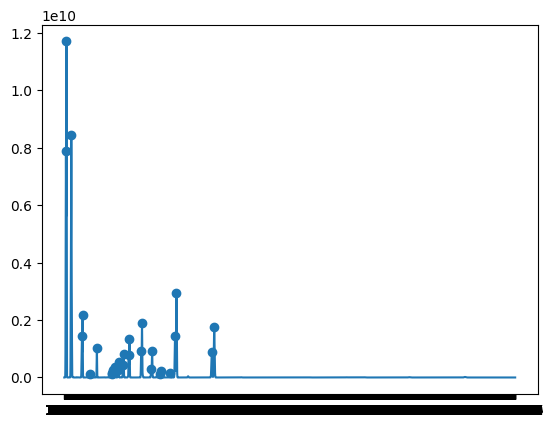

In [8]:
plt.plot(Reference_Spectra.Wavelength,Reference_Spectra.Spectra) #plot a nomral ,x ,y plot)
plt.scatter(Selected_Reference_Spectra.Wavelength,Selected_Reference_Spectra.Spectra)

# Now , lets try to create an list , lets fill the list , with all the detected peaks wavelengths. 

In [9]:

Refernce_Spectra_Wavelength = Reference_Spectra.iloc[Reference_Peak]
Reference_Spectra_List = []

for iteam in Refernce_Spectra_Wavelength.Wavelength:
    iteam = float(iteam)
    if iteam > 187.0:        #Only those iteam will be selected , whose wavelength would be greater than 188 nm ,  as our Handheld LIBS range starts from 188nm
        Reference_Spectra_List.append(iteam)
    
print(Reference_Spectra_List)
Length_Reference_Spectra_List = (len(Reference_Spectra_List))   #Used for Calculating Percentage Detection

[193.11, 199.06, 212.32, 212.96, 213.47, 214.58, 215.09, 216.87, 217.43, 220.49, 221.0, 226.35, 226.91, 236.73, 237.32, 256.8, 257.52, 265.26, 266.02, 281.62, 308.2, 309.26, 394.38, 396.16]


Now , we have a list of all wavelengths , detected for Peaks in Reference Spectra , Now for each element lets try to create a min and max of each element in the list. 

'Reference_Spectra_Min_Max' is list consisting of a sublist , the sublist have a min and max value or a range of element in the list.

Now , for the two wavelengths , to exactly match with each other , is going to be difficult because of the spectral resultion of the sensor, It's always better , to find a span or range for wavelength , and to look for peak in that span or range, which would give us more probability in detecting a peak. 

Eg : - A peak of 199.06 nm can be found in between [ 199.04  and 199.08] , this gives us more room to find a wavelength 

-------------------------------------------------------------------------------------------------------------------------------

# 0.0333 is the sprectral resolution of the Handheld LIBS Device

Now , the Spectral Resolution of Data from NIST Website is 0.3 ,while the Spectral Resolution od Handheld LIBS Device is 0.03. 

So , I am creating a range , in Reference Spectrum , of where the Signal might be expected , for the Handheld LIBS Device.


In [10]:
Reference_Spectra_Min_Max = []

Reference_Spectra_Min_Max = [[num - 0.3332, num + 0.3332] for num in Reference_Spectra_List]     
    
print(Reference_Spectra_Min_Max)

[[192.7768, 193.44320000000002], [198.7268, 199.3932], [211.9868, 212.6532], [212.6268, 213.2932], [213.1368, 213.8032], [214.2468, 214.91320000000002], [214.7568, 215.4232], [216.5368, 217.2032], [217.0968, 217.7632], [220.1568, 220.8232], [220.6668, 221.3332], [226.0168, 226.6832], [226.5768, 227.2432], [236.39679999999998, 237.0632], [236.9868, 237.6532], [256.46680000000003, 257.1332], [257.1868, 257.85319999999996], [264.9268, 265.59319999999997], [265.6868, 266.35319999999996], [281.2868, 281.9532], [307.8668, 308.53319999999997], [308.9268, 309.59319999999997], [394.0468, 394.7132], [395.82680000000005, 396.4932]]


Once we have got the range for the Reference Spectra , where the Element  Spectra can be expected. Now let's try to find all the peak of the 'Sample_Spectra' , Here also tuning of the paramters are important as per you analysis
-------------------------------------------------------------------------------------------------------------------------------

In [11]:
# METHOD 1 - PeakUtils

# minimum_distance_2 = 0  #Minimum distance between each detected peak. The peak with the highest amplitude is preferred to satisfy this constraint.
# threshold_2 = 0.05 #looking for a value above 5% , so that Noise and  Peak with very low Intensities can be ignored, absolute heights considered.

# Sample_Peak = indexes(Sample_Spectra.Intensities , min_dist=minimum_distance_2 , thres=threshold_2) 
# Sample_Peak #Return the indices in the form of the list


####################################################################################################################################################

#METHOD 2 - Scipy 

height_2 = None
Peak_Prominenace = None #Uses S/N ratio , as comapred to other peaks
minimum_distance_3 = None   #minimum distance between two peaks

Sample_Peak , _ = fp(Sample_Spectra.Intensities,height=height_2,prominence=Peak_Prominenace,distance=minimum_distance_3)
Sample_Peak



array([  243,   252,   259, ..., 23055, 23077, 23083])

In [12]:
Selected_Sample_Spectra = Sample_Spectra.iloc[Sample_Peak] 
Selected_Sample_Spectra

,wavelength,Intensities
243,188.100000,53.029599
252,188.400000,42.352117
259,188.633333,47.462784
266,188.866667,49.913583
272,189.066667,57.371327
...,...,...
23036,947.866667,46.528927
23046,948.200000,46.375758
23055,948.500000,40.354437
23077,949.233333,35.368964


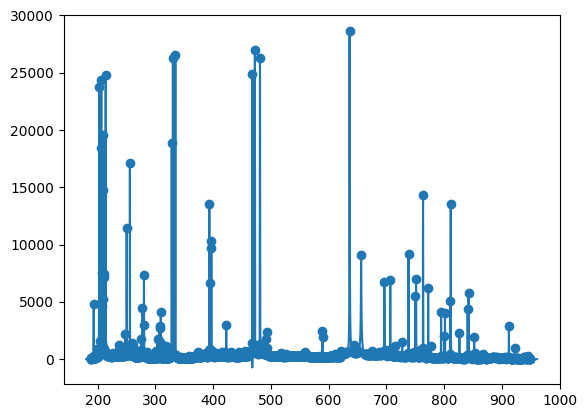

In [13]:
plt.plot(Sample_Spectra.wavelength , Sample_Spectra.Intensities) #plot a nomral ,x ,y plot)
plt.scatter(Selected_Sample_Spectra.wavelength,Selected_Sample_Spectra.Intensities)

Now , lets try to create an list , lets fill the list , with all the detected peaks wavelengths of the sample spectra.

Remember , Sample Spectra , has all the element within like Al , Fe , Cu , Mn , Mo etc)


In [14]:
Sample_Spectra_Wavelength = Sample_Spectra.iloc[Sample_Peak]

Sample_Spectra_List = []

for iteam in Sample_Spectra_Wavelength.wavelength:
    iteam = float(iteam)
    Sample_Spectra_List.append(iteam)
    
print(Sample_Spectra_List)


[188.09999999999957, 188.39999999999952, 188.63333333333284, 188.86666666666616, 189.06666666666612, 189.2333333333328, 189.4333333333328, 189.6666666666661, 190.1333333333328, 190.4999999999994, 190.86666666666605, 191.16666666666603, 191.49999999999932, 191.866666666666, 192.1999999999993, 192.3999999999993, 193.09999999999928, 193.29999999999924, 193.63333333333256, 193.86666666666588, 194.26666666666583, 194.5999999999992, 194.89999999999915, 195.2666666666658, 195.43333333333248, 195.73333333333244, 195.96666666666576, 196.1333333333324, 196.5333333333324, 196.9333333333324, 197.1333333333324, 197.499999999999, 197.799999999999, 198.19999999999897, 198.4666666666656, 198.83333333333223, 199.03333333333225, 199.2999999999989, 199.89999999999887, 200.16666666666552, 200.43333333333217, 200.7999999999988, 201.06666666666547, 202.59999999999872, 203.79999999999865, 204.09999999999863, 204.46666666666528, 204.89999999999856, 205.3333333333319, 206.23333333333184, 206.43333333333183, 20

# So far so now , i have two list with me 

1) Sample_Spectra_List = Containg wavelngths of all Peaks from data of Handheld LIBS device
2) Reference_Spectra_Min_Max = Containing a range of wavelength , for all the peak detected in the Reference Sample

   

In [15]:
print(Sample_Spectra_List)

[188.09999999999957, 188.39999999999952, 188.63333333333284, 188.86666666666616, 189.06666666666612, 189.2333333333328, 189.4333333333328, 189.6666666666661, 190.1333333333328, 190.4999999999994, 190.86666666666605, 191.16666666666603, 191.49999999999932, 191.866666666666, 192.1999999999993, 192.3999999999993, 193.09999999999928, 193.29999999999924, 193.63333333333256, 193.86666666666588, 194.26666666666583, 194.5999999999992, 194.89999999999915, 195.2666666666658, 195.43333333333248, 195.73333333333244, 195.96666666666576, 196.1333333333324, 196.5333333333324, 196.9333333333324, 197.1333333333324, 197.499999999999, 197.799999999999, 198.19999999999897, 198.4666666666656, 198.83333333333223, 199.03333333333225, 199.2999999999989, 199.89999999999887, 200.16666666666552, 200.43333333333217, 200.7999999999988, 201.06666666666547, 202.59999999999872, 203.79999999999865, 204.09999999999863, 204.46666666666528, 204.89999999999856, 205.3333333333319, 206.23333333333184, 206.43333333333183, 20

In [16]:
print(Reference_Spectra_Min_Max)

[[192.7768, 193.44320000000002], [198.7268, 199.3932], [211.9868, 212.6532], [212.6268, 213.2932], [213.1368, 213.8032], [214.2468, 214.91320000000002], [214.7568, 215.4232], [216.5368, 217.2032], [217.0968, 217.7632], [220.1568, 220.8232], [220.6668, 221.3332], [226.0168, 226.6832], [226.5768, 227.2432], [236.39679999999998, 237.0632], [236.9868, 237.6532], [256.46680000000003, 257.1332], [257.1868, 257.85319999999996], [264.9268, 265.59319999999997], [265.6868, 266.35319999999996], [281.2868, 281.9532], [307.8668, 308.53319999999997], [308.9268, 309.59319999999997], [394.0468, 394.7132], [395.82680000000005, 396.4932]]


# Finally , My  idea is see , if each iteam in (Reference_Spectra_Min_Max) , matches with each element in (Sample_Spectra_List) , and then caluclate the exact matching Percentage 


In [17]:
plot_spectra_wavelength_list=[]
plot_reference_wavelength_list = []
count = 0
for cell in Reference_Spectra_Min_Max: 
    for iteam in Sample_Spectra_List:
        if iteam >= cell[0] and iteam <= cell[1]:
            count = count + 1 #for counting
            plot_spectra_wavelength_list.append(iteam)
            plot_reference_wavelength_list.append(cell[0] + 0.0333)

plot_spectra_intensities_list=[]
for iteam in plot_spectra_wavelength_list:
    Inte = Selected_Sample_Spectra.loc[Selected_Sample_Spectra['wavelength'] == iteam, 'Intensities'].iloc[0]
    plot_spectra_intensities_list.append(Inte)
#print(plot_spectra_intensities_list)

#print(plot_spectra_wavelength_list)

print('The total peaks detected were ' + str(count) + '\n' )

print('The following peaks , for Reference Sample was detected  :- '  )
print(plot_reference_wavelength_list )

print('\n')
print('The Sample Peaks detected from the sample were:-')
spectra_df = pd.DataFrame({'wavelength': plot_spectra_wavelength_list, 'intensities': plot_spectra_intensities_list})
print(spectra_df)  

The total peaks detected were 42

The following peaks , for Reference Sample was detected  :- 
[192.8101, 192.8101, 198.7601, 198.7601, 198.7601, 212.02009999999999, 212.02009999999999, 212.02009999999999, 212.6601, 212.6601, 214.7901, 216.5701, 216.5701, 217.1301, 217.1301, 220.1901, 220.1901, 220.7001, 226.0501, 226.0501, 226.6101, 226.6101, 236.43009999999998, 236.43009999999998, 237.02009999999999, 256.50010000000003, 256.50010000000003, 257.2201, 264.9601, 264.9601, 264.9601, 265.7201, 265.7201, 281.3201, 307.9001, 307.9001, 308.9601, 308.9601, 394.0801, 394.0801, 395.86010000000005, 395.86010000000005]


The Sample Peaks detected from the sample were:-
    wavelength  intensities
0   193.100000  4800.257819
1   193.300000   290.321771
2   198.833333   186.771679
3   199.033333   845.727836
4   199.300000   211.616878
5   212.033333   470.973475
6   212.433333   632.634967
7   212.633333   532.351607
8   212.633333   532.351607
9   213.100000   678.509716
10  215.266667   475.4453

# RESULTS

In [18]:
percentage = (count / Length_Reference_Spectra_List) * 100
percentage

print (sample + ' Ananlysis of ' + element + ' was done , and the ' + str(count) +  ' number of spectral lines from the material sample ' + sample + ' matched with the ' + str(Length_Reference_Spectra_List) + ' choosen Reference element of '+ element + ' therefore , we can say' ,  str(percentage) + '%' + ' matched as per the parameters set by the user')

NameError: name 'sample' is not defined

Find the Correponding Intensities , for the wavelengths available in "plot_spectra_wavelength_list" and also for the wavelengths available in "plot_refernce_intensities_list"

# Generate a Interactive Plot

In [ ]:
p = figure(title = 'Peak Detection' , x_axis_label = 'Wavelength' , y_axis_label = 'Intensities')
p.line(Sample_Spectra.wavelength,Sample_Spectra.Intensities , line_width = 2, color ="red" )
p.circle(spectra_df.wavelength, spectra_df.intensities , color = 'green' , size = 12)

p.width = 1200
p.height = 600

show(p)

